In [39]:
%load_ext autoreload
%autoreload 2
from src.data import EarthquakeCatalog, Slab
from src.catalogs import JapanSlowSlipCatalog, ESTEarthquakeCatalog
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
mpl.rcParams.update({'font.size': 8})
mpl.rcParams.update({'figure.dpi': 100})
plt.style.use("tableau-colorblind10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
slowslip = JapanSlowSlipCatalog()
earthquakes = ESTEarthquakeCatalog()
slab = Slab('kur')

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  sc

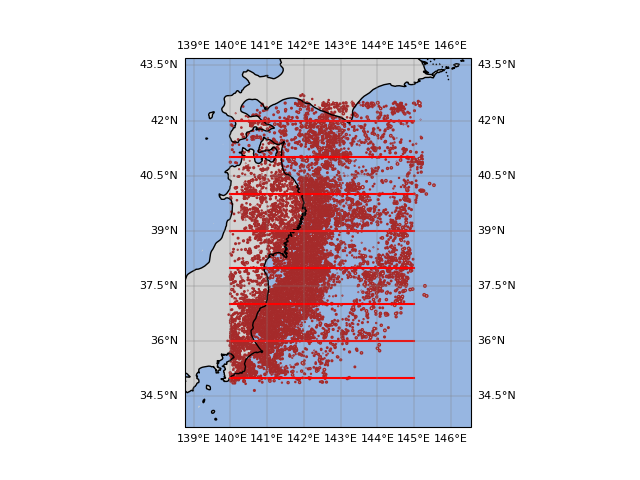

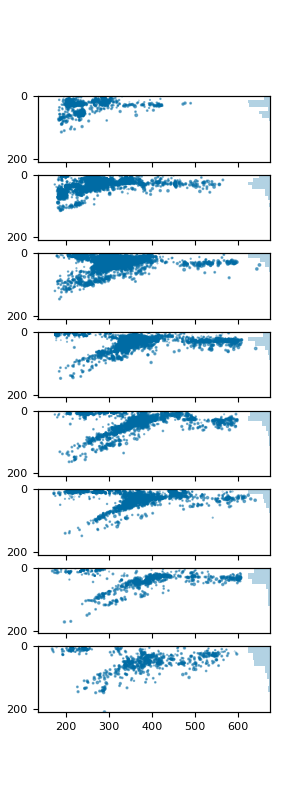

In [41]:
ax = earthquakes.plot_map()

lat_range = range(35, 43)
lon_bounds = [140, 145]
[ax.plot(lon_bounds,[lat,lat],color='r',**{"transform": cartopy.crs.PlateCarree()}) for lat in lat_range] 

fig, AX = plt.subplots(len(lat_range),1,figsize=(3,len(lat_range)*1),sharex=True,sharey=True)
for lat, ax in zip(lat_range, AX):
    earthquakes.plot_depth_cross_section(p1=[138,lat], p2=[143,lat],width_km=50, ax=ax)
    ax.set_xlabel("")

In [42]:
local_earthquakes = earthquakes.intersection(slowslip,buffer_radius_km=100.0)
local_slowslip = slowslip.intersection(earthquakes,buffer_radius_km=10.0)

In [43]:
distances = slab.distance(
    local_earthquakes.catalog[['lat','lon','depth']].values,
    from_latlon=True,
    depth_unit="km",
    distance_unit="km"
)
slab_earthquakes = EarthquakeCatalog(local_earthquakes.catalog.loc[distances<10])

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot: xlabel='Distance along section (km)', ylabel='Depth (km)'>

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


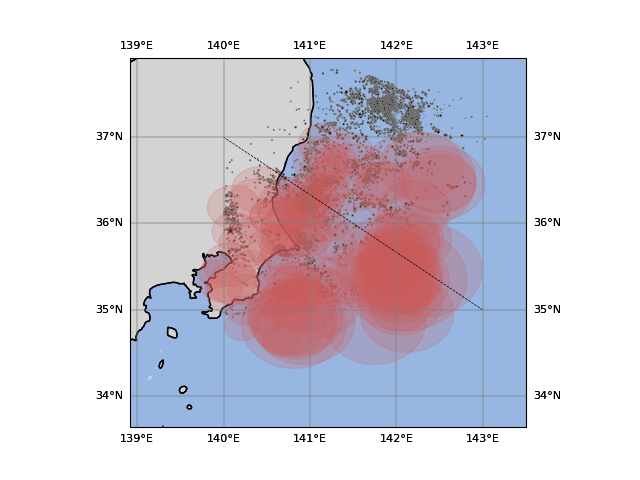

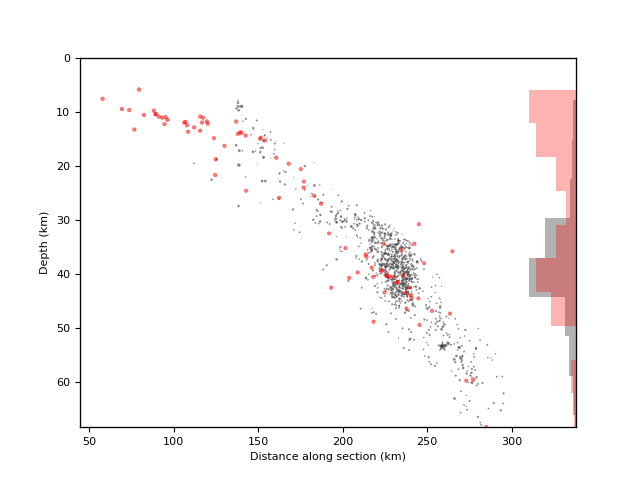

In [44]:
earthquakes_scatter_kwargs = {"c":'k','edgecolor':'grey','linewidth':0.5}
slow_slip_scatter_kwargs = {"c":'red','edgecolor':'red','linewidth':0.5}
p1, p2 = [[143,35],[140,37]]


ax = slab_earthquakes.plot_map(scatter_kwarg=earthquakes_scatter_kwargs, k_largest_events=1)
local_slowslip.plot_map(ax=ax)
ax.plot([p1[0],p2[0]],[p1[1],p2[1]],'k--',linewidth=0.5, **{"transform": cartopy.crs.PlateCarree()})

p1, p2 = [[143,35],[140,37]]
ax = slab_earthquakes.plot_depth_cross_section(p1, p2, width_km=20, kwargs=earthquakes_scatter_kwargs, k_largest_events=1)
local_slowslip.plot_depth_cross_section(p1, p2, width_km=100, kwargs=slow_slip_scatter_kwargs, ax=ax)

**Notes on the spatial relationship between slow slip and seismicity in the southern japan trench:**

Slow slip events centroids span depths of 7-60 km. The depth distribution is bimodal. Events an updip cluster around 10 km; events downdip cluster around 40 km. 

Most seismicity in SNET catalog is shallow and in the upper crust. A zone of seismicity seems to delineate the downgoing slab. Along this zone of seismicity, shallow slow slip events seem complementary to the earthquakes. In contrast the deeper slow slip events occur in the same location as the deeper seismicity.

Questions:
- Is the seismicity on the plate interface, or in the upper crust?
- Is the evidence sufficient to suggest two distinct populations if slow slip events?
- Is the spatio-temporal relationship between seismicity and slow slip differenct for the updip and downdip cluster?

<AxesSubplot: xlabel='Time', ylabel='mag'>

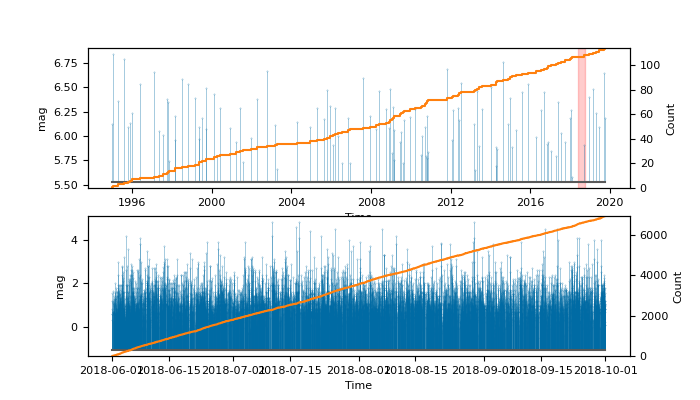

In [45]:
fig, AX = plt.subplots(2,1,figsize=(7,4))
ax = local_slowslip.plot_time_series(ax=AX[0])
ax.axvspan(slab_earthquakes.start_time, slab_earthquakes.end_time, alpha=0.2, color='red')
slab_earthquakes.plot_time_series(ax=AX[1])

<AxesSubplot: xlabel='Time', ylabel='mag'>

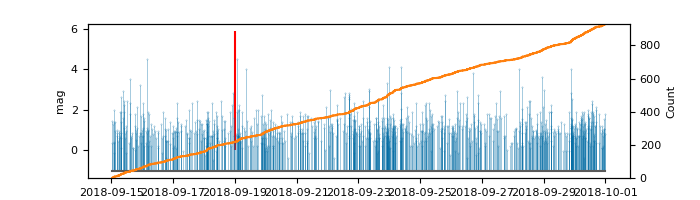

In [46]:
fig, ax = plt.subplots(figsize=(7,2),sharex=True)
ax.stem(local_slowslip.get_time_slice('2018-09-15','2018-10-01').catalog.time, local_slowslip.get_time_slice('2018-09-15','2018-10-01').catalog.mag, markerfmt=' ', linefmt='r-', basefmt=' ')
slab_earthquakes.get_time_slice('2018-09-15','2018-10-01').plot_time_series(ax=ax)
# ax.set(
#     xlim=[.catalog.time.min(),slab_earthquakes.catalog.time.max()]
# )

There is one slow slip event in the period of the SNET catalog. It does appear to be associated with the largest recorded event in the local SNET catalog. 